# Numerical Methods Project 

Suppose we have a system 

$$ \dot{x} = a - x - \frac{4xy}{1+x^2}$$
$$\dot{y} = bx\left(1-\frac{y}{1+x^2}\right)$$

with the initial conditions, 

$$x(0) = 0$$
$$y(0) = 1$$

which represents the amount of chemical species $x$ and $y$ over time as they react with each other and a third species which has, essentially, a constant amount. 


The true values of the parameters $(a,b)$ are $(10,4)$. However, when taking measurements in the experiment we naturally obtain measurement error of the data $\hat{x}(t)$ and  $\hat{y}(t)$. We can explore this scenario as follows:

## 1. Simulate the system from $t=0$ to $t=100$ for the true parameters to obtain data $\hat{x}(t)$ and  $\hat{y}(t)$ (the hat notation just helps us specify which simulation data is true).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2

In [2]:
def y_func_update(x_old,y_old):
    return (dt*b*x_old+y_old)/(1+dt*b*x_old/(1+x_old**2))
    
def F(x_new,x_old,y_old):
    return -x_new+x_old+dt*(a-x_new-4*x_new*(dt*b*x_old+y_old)/(1+dt*b*x_old/(1+x_old**2))/(1+x_new**2))

def num_dfdx(x0,x1,f,x_old,y_old):
    return (f(x1,x_old,y_old)-f(x0,x_old,y_old))/(x1-x0)

In [3]:
def secant(x0,x1,f,x_old,y_old):
    '''
    Performs Secant Method of root finding on f(x). Also plots linear approximation of first three guesses.
    
    Input
    -----
        x0: scalar, initial guess of root
        x1: scalar, second guess of root
        f: function, function we are solving for root
        x_old: scalar, value of latest simulation for x
        y_old: scalar, value of latest simulation for y
        
    Output
    ------
        x_new: scalar, best guess via Secant's method
    
    '''
    # initial set up
    x_array = [x0,x1]
    error_tolerance = 1e-2
    
    if num_dfdx(x0,x1,f,x_old,y_old) == 0:
        print('Secant has zero valued slope')
        
    else:

        # find the root using secant method
        while abs(f(x_array[-1],x_old,y_old)) > error_tolerance:
            x0 = x_array[-2]
            x1 = x_array[-1]
            if num_dfdx(x0,x1,f,x_old,y_old) == 0:
                break
            x2 = x1 - (f(x1,x_old,y_old)/num_dfdx(x0,x1,f,x_old,y_old))
            x_array.append(x2)

        return x_array[-1]

In [4]:
def single_step(F,x_old,y_old):

    x_new = secant(x_old,x_old+0.1,F,x_old,y_old)
     
    y_new = y_func_update(x_old, y_old)
    
    return x_new, y_new

def run(F,x0,y0,n):
    x_sol = [x0]
    y_sol = [y0]
    
    for i in range(0,n):
        x_new, y_new = single_step(F,x_sol[-1],y_sol[-1])
        x_sol.append(x_new)
        y_sol.append(y_new)
        
    return x_sol, y_sol

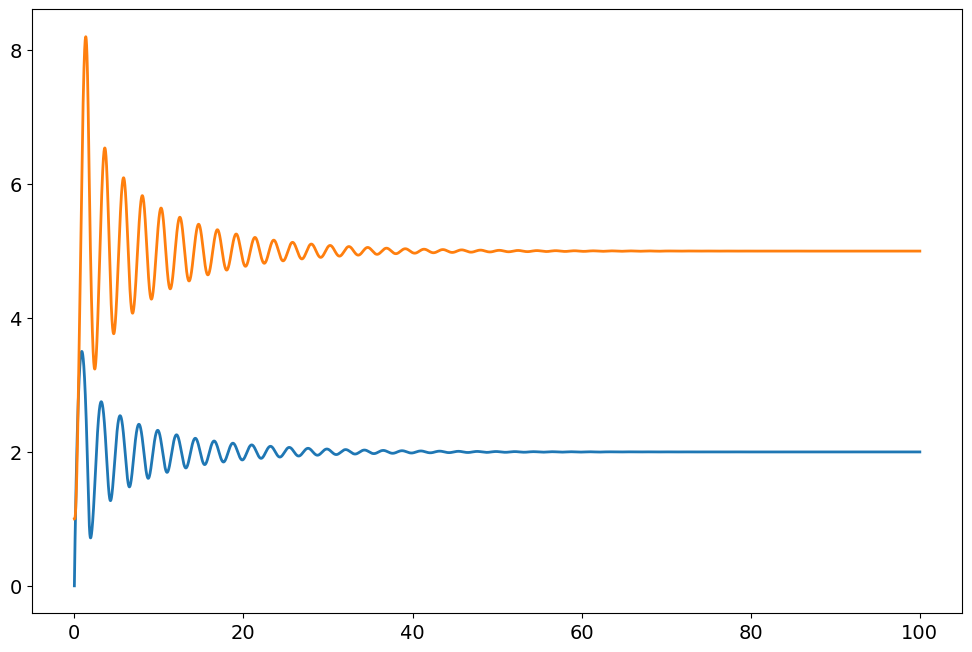

In [98]:
# set initial conditions
x0 = 0
y0 = 1

a=10
b=4

T = 100
dt = 0.001
n = int(T/dt)

x_sol, y_sol = run(F,x0,y0,n)

time_seq = np.arange(0,T+dt,dt)
plt.plot(time_seq,x_sol)
plt.plot(time_seq,y_sol)
x_sol4 = x_sol
y_sol4 = y_sol

## 2. We do not have an analytic solution to compare the results with. However, we can tell that the system seems to settle down onto a steady state, where both $x$ and $y$ no longer change. For the ODE system, consider the $x$ and $y$ values which ensure $\dot{x} = 0$ and $\dot{y} = 0$. What are these values and are the simulations consistent with these values?

In [139]:
a233 = np.where(time_seq == 37.5)[0][0]

In [140]:
a233

37500

In [158]:
def dfdt(t,xy_sequ):
    global pin
    pin = np.where(time_seq == t)[0][0]
    return (xy_sequ[pin]-xy_sequ[pin+1])/(time_seq[pin]-time_seq[pin+1])

In [159]:
def GD_method(dfdt,t0,xy_sequ,tol):
    '''
    Performs the gradient descent algorithm 
    
    Inputs
    ------
        dfdx: function, the gradient of the function we want to minimize
        x0: scalar, initial seed
        lamb: scalar, lambda value of step size
        
    Outputs
    -------
        x_array: array, values guessed for minimizing value
    ''' 
    
    t_array = [t0]
    
    while abs(dfdt(t_array[-1],xy_sequ)) > tol:
        if dfdt(t_array[-1],xy_sequ)>0:
            t_pin = time_seq[pin-1]
            t_array.append(t_pin)
        elif dfdt(t_array[-1],xy_sequ)<0:
            t_pin = time_seq[pin+1]
            t_array.append(t_pin)        
    return t_array

37.705

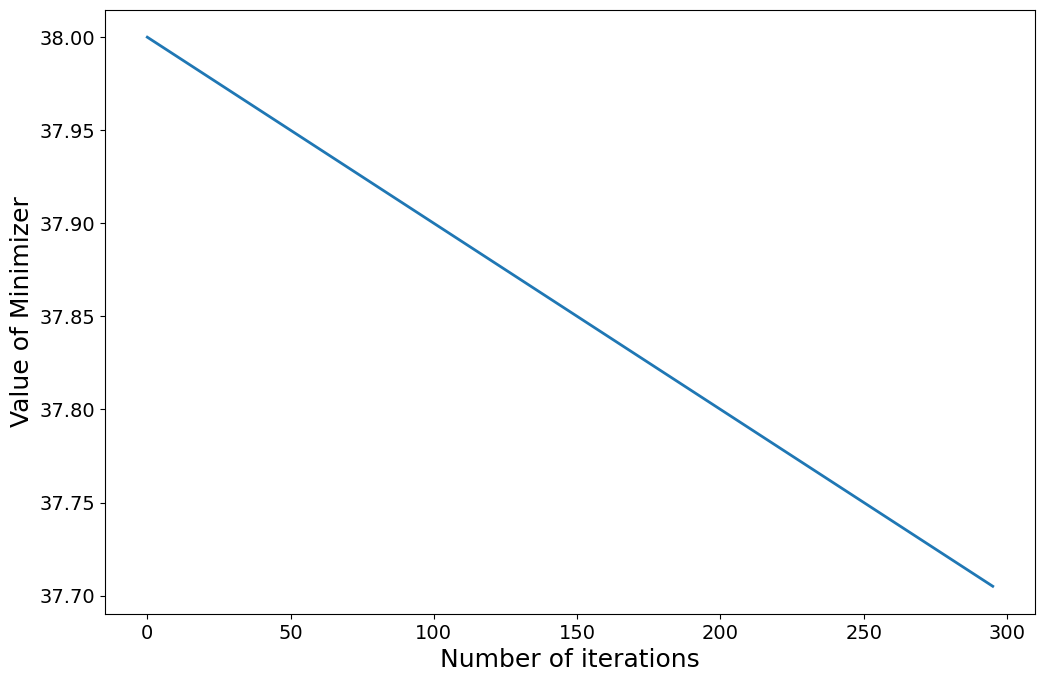

In [161]:
# Let's look at what happens when we change lambda

t0 = 38
tol = 1e-2
t_array = GD_method(dfdt,t0,x_sol, tol)

plt.plot(t_array)
plt.xlabel('Number of iterations')
plt.ylabel('Value of Minimizer')
t_array[-1]

37.995

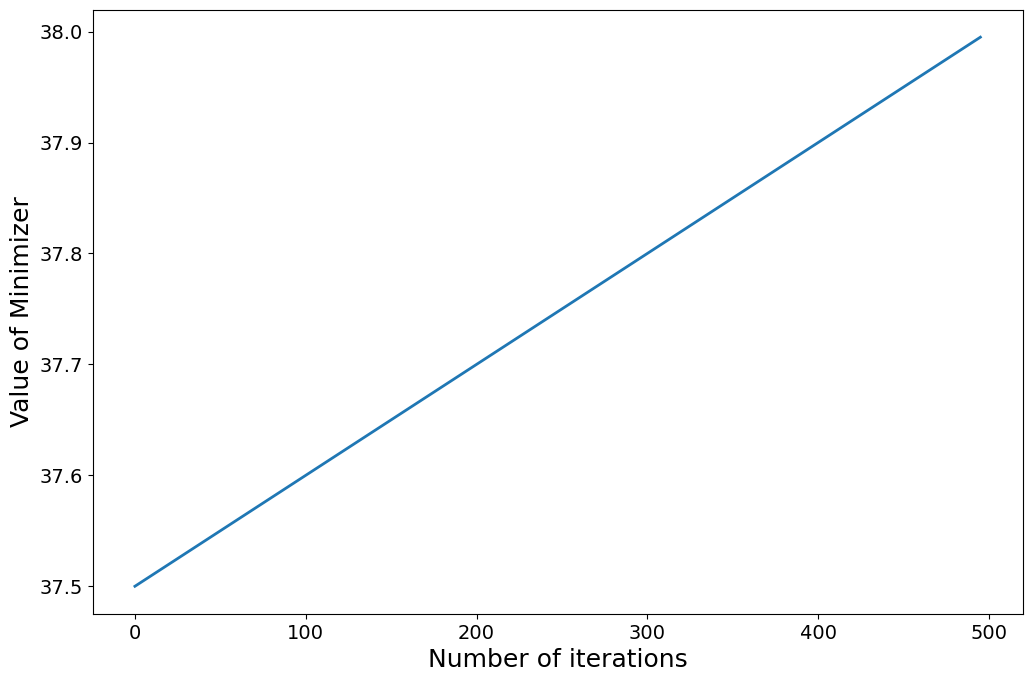

In [162]:
# Let's look at what happens when we change lambda

t0 = 37.5
tol = 1e-2
t_array = GD_method(dfdt,t0,y_sol, tol)

plt.plot(t_array)
plt.xlabel('Number of iterations')
plt.ylabel('Value of Minimizer')
t_array[-1]

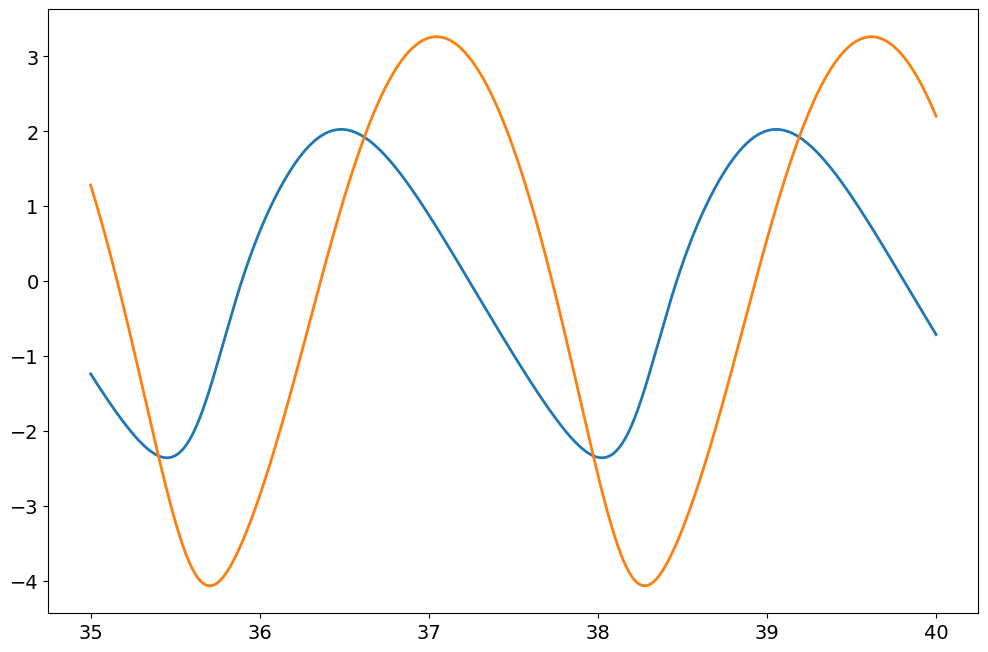

In [281]:
grad_x=[]
grad_y=[]
grad_time_seq=[]

t0 = 35
t1 = 40

ind0 = t0*1000
ind1 = t1*1000

for i in range(ind0,ind1):
    grad_x.append((x_sol[i]-x_sol[i+1])/(time_seq[i]-time_seq[i+1]))
    grad_y.append((y_sol[i]-y_sol[i+1])/(time_seq[i]-time_seq[i+1]))
    grad_time_seq.append((time_seq[i]+time_seq[i+1])/2)

plt.plot(grad_time_seq,grad_x)
plt.plot(grad_time_seq,grad_y)



In [150]:
(y_sol[38000]-y_sol[38001])/(time_seq[38000]-time_seq[38001])

-0.008256978904183457

## 3. Interpret the results from problems 1 and 2.

## 4. Add random noise in the form of normally distributed random values to the true data from the previous simulation, $\hat{x}(t)$ and $\hat{y}(t)$. This reflects the measurement error. We can write the data with error as $\tilde{x}(t)$ and $\tilde{y}(t)$. To obtain this data, set

## $$\tilde{x} = \hat{x}(t) + np.random.normal(0,\sigma, len(\hat{x}))$$
## $$\tilde{y} = \hat{y}(t) + np.random.normal(0,\sigma, len(\hat{y}))$$

## for $\sigma = 0.1$. 

## Plot the new data.

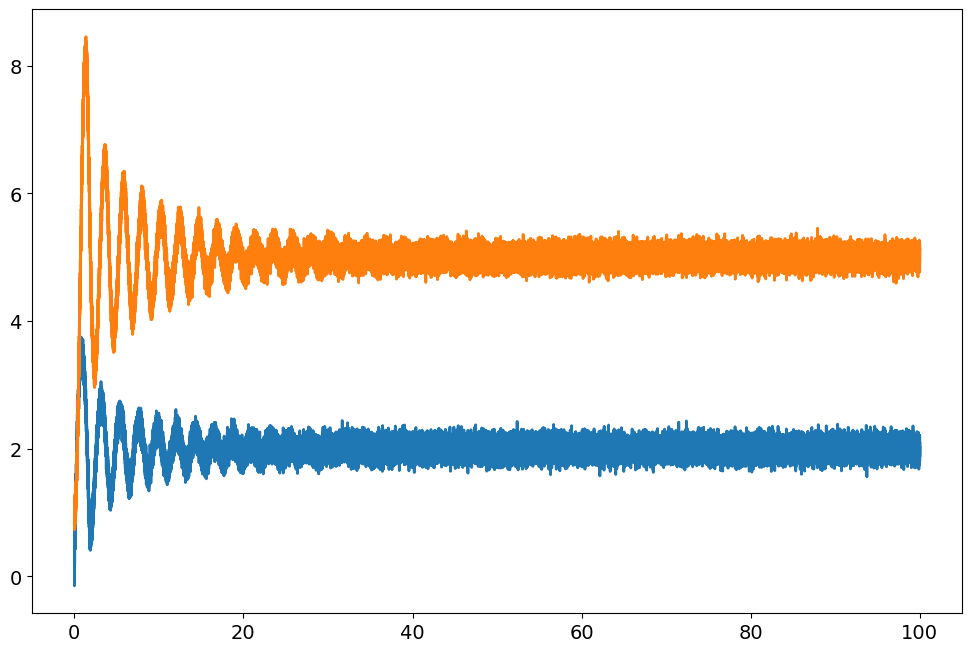

In [73]:
sigma = 0.1
x_rand = np.array(x_sol) + np.random.normal(0,sigma,len(x_sol))
y_rand = np.array(y_sol) + np.random.normal(0,sigma,len(y_sol))


plt.plot(time_seq,x_rand)
plt.plot(time_seq,y_rand)

## 5. Fit a new simulation to the data that is now corrupted by measurement error by first setting the parameters to $(a,b) = (10,3)$ and using an optimisation algorithm to find the best values of the parameter $b$ such that for the new simulation $x(t)$ and $y(t)$,

## $$L_2 = || \tilde{x} - x|| + ||\tilde{y} - y|| $$

## is minimised. Note that 

## $$|| \tilde{x} - x|| = \frac{1}{N}\sum_i^N (\tilde{x}(t_i) - x(t_i))^2$$
## $$|| \tilde{y} - y|| = \frac{1}{N}\sum_i^N (\tilde{y}(t_i) - y(t_i))^2$$


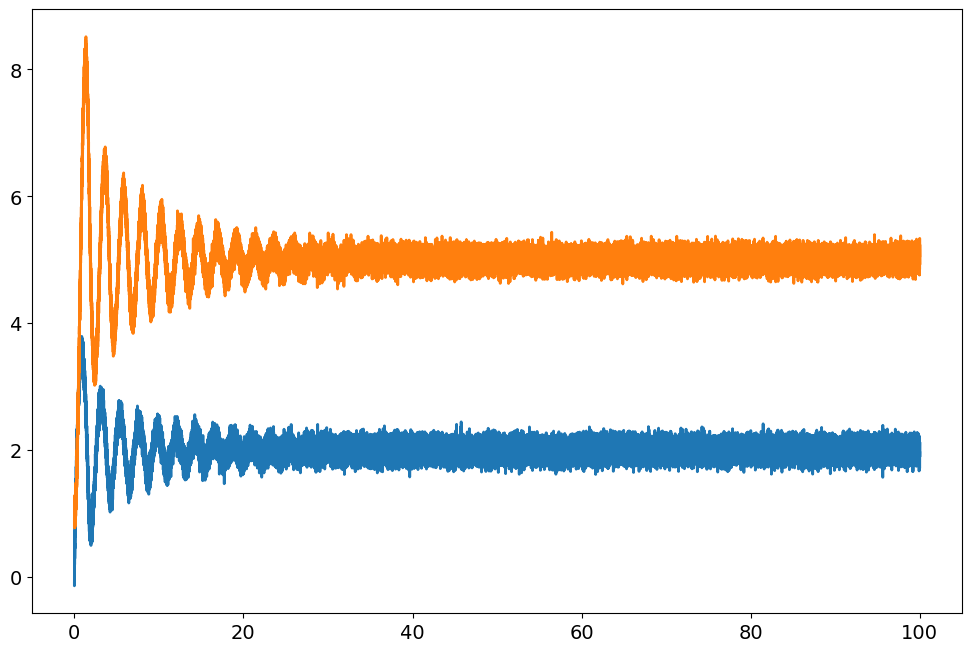

In [282]:
# set initial conditions
x0 = 0
y0 = 1

a=10
b=4

T = 100
dt = 0.001
n = int(T/dt)
time_seq = np.arange(0,T+dt,dt)

x_sol, y_sol = run(F,x0,y0,n)

sigma = 0.1

x_rand_nml = np.random.normal(0,sigma,len(x_sol))
y_rand_nml = np.random.normal(0,sigma,len(y_sol))

x_rand = np.array(x_sol) + x_rand_nml
y_rand = np.array(y_sol) + y_rand_nml


plt.plot(time_seq,x_rand)
plt.plot(time_seq,y_rand)


In [285]:
def L2(b_para):
    '''
    Defines the sum of square error between numerical approximation and exact solution
    '''    
    global b
    b=b_para

    x_sol, y_sol = run(F,0,1,n)
    x_rand = np.array(x_sol) + np.random.normal(0,sigma,len(x_sol))
    y_rand = np.array(y_sol) + np.random.normal(0,sigma,len(y_sol))
    
    return (sum((x_rand - x_sol4)**2)+sum((y_rand - y_sol4)**2))/len(time_seq)

In [286]:
alist = np.linspace(3,5,10)
L22 = []
for i in alist:
    print(L2(i))
    L22.append(L2(i))
plt.plot(alist,L22)


1.6395681261324206
1.1535331038149468
0.5276573042687919


KeyboardInterrupt: 

In [287]:
3.900250221965116-3.811194200921782

0.08905602104333399

In [179]:
def num_dfdb(f,b0,b1):
    return (f(b0)-f(b1))/(b0-b1)



def G(f,b0,b1,lamb):
    b_array = [b0,b1]
    error_tolerance = 1e-2
    
    if num_dfdb(f,b0,b1) == 0:
        print('Secant has zero valued slope')
        
    else:

        # find the root using secant method
        while abs(num_dfdb(f,b0,b1)) > error_tolerance:
            print("num_dfdb",num_dfdb(f,b0,b1))
            print("b0",b0)
            b0 = b_array[-2]
            print("b1",b1)
            b1 = b_array[-1]
            if num_dfdb == 0:
                break
            b2 = b1 - (lamb*num_dfdb(f,b0,b1))
            b_array.append(b2)
    
    return b_array



In [ ]:
def indexOf(t_stamp):
    return np.where(time_seq == t_stamp)[0][0]

def num_dfdt(sol,sol_t,t):
    return (sol[indexOf(t)]-sol[indexOf(t)+1])/(sol_t[indexOf(t)]-sol_t[indexOf(t)+1])

def GD_dfdt(sol,sol_t,t0,tol=1e-2):
    GD_t_seq = [t0]
    while abs(num_dfdt(sol,sol_t,GD_t_seq[-1])) > tol:
        if num_dfdt(sol,sol_t,GD_t_seq[-1]) > 0:
            GD_t_seq.append(sol_t[indexOf(GD_t_seq[-1])-1])
        elif num_dfdt(sol,sol_t,GD_t_seq[-1]) < 0:
            GD_t_seq.append(sol_t[indexOf(GD_t_seq[-1])+1])        
    return GD_t_seq

In [ ]:
G(L2,3,3.1,0.1)

## 6. More realistically, we will have far fewer experimental data points. Suppose we have a measurement every 10 time units. Downsample the data with error $\tilde{x}$ and $\tilde{y}$ to reflect this measurement frequency. For example, if you have $dt = 0.1$ then you need to select every 100 data points in the arrays $\tilde{x}$ and $\tilde{y}$. This can be done with the following code,

## $$\tilde{x}_{subsample} = \tilde{x}[::100]$$

## where the number after the two colons is the frequency of subsampling, i.e. $\tilde{x}_{subsample}$ will contain the values $\tilde{x}[0], \tilde{x}[99],\tilde{x}[199], \tilde{x}[299], \cdots$ 

## Repeat problem 5 with this subsample. Note that for the norm of the simulation against the subsample, you will need to downsample the simulation exactly as you have downsampled the measurement data. For example, 

## $$L_2 = || \tilde{x}_{subsample} - x[::100]|| + ||\tilde{y}_{subsample} - y[::100|| $$

In [182]:
x_sol4_downspl = x_sol4[::100]
y_sol4_downspl = y_sol4[::100]

def L2_downspl(b_para):
    '''
    Defines the sum of square error between numerical approximation and exact solution
    '''    
    global b
    b=b_para

    x_sol, y_sol = run(F,0,1,n)
    x_rand = np.array(x_sol[::100]) + x_rand_nml[::100]
    y_rand = np.array(y_sol[::100]) + y_rand_nml[::100]
    
    return (sum((x_rand - x_sol4_downspl)**2)+sum((x_rand - y_sol4_downspl)**2))/len(time_seq)

In [183]:
G(L2_downspl,3,3.1,0.1)

num_dfdb -0.010873647069360715
b0 3
b1 3.1


KeyboardInterrupt: 

## 7. Because this is an idealised system, we can find some interesting but less-than-physical behaviours. For example, the system can settle into a cyclic exchange between the species $x$ and $y$. Let the parameters be $(a,b) = (10,3)$. Simulate this ODE system.

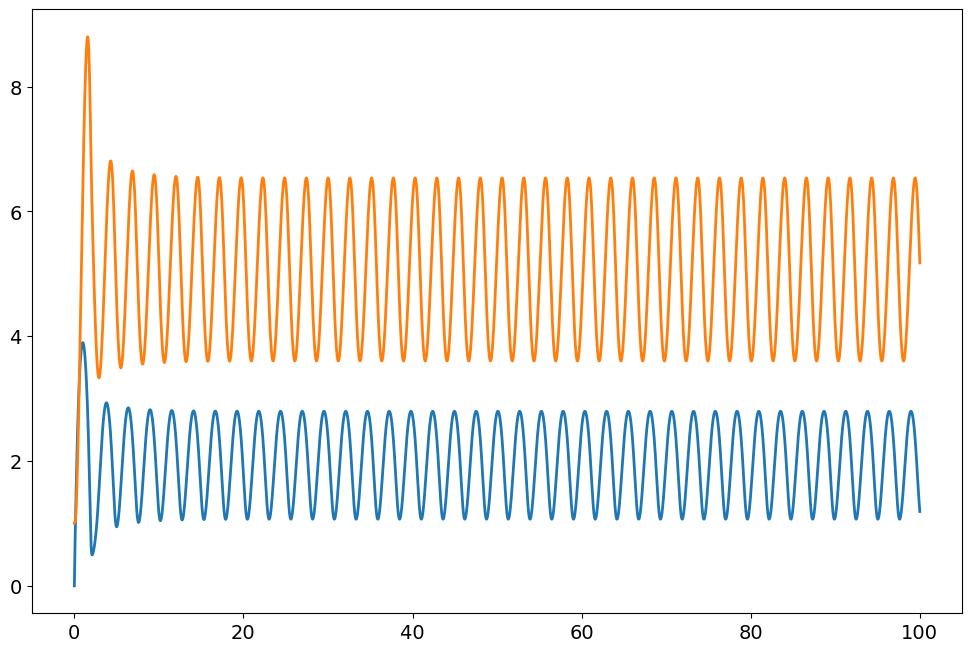

In [185]:
# set initial conditions
x0 = 0
y0 = 1

a=10
b=3

T = 100
dt = 0.001
n = int(T/dt)
time_seq = np.arange(0,T+dt,dt)

x_sol, y_sol = run(F,x0,y0,n)

sigma = 0.1

x_rand = np.array(x_sol) + x_rand_nml
y_rand = np.array(y_sol) + y_rand_nml


plt.plot(time_seq,x_sol)
plt.plot(time_seq,y_sol)


## 8. Given $a=10$ and $0<b<3.5$, the system converges to what is called a limit cycle. We can find the period of the cycle by first letting the system enter the cycle and then calculating the time until the values $(x(t),y(t))$ repeat themselves. 

## For $(a,b) = (10,3)$, simulate the first 100 time units and then solve for the time $T^* = 100 + T_{period}$ such that 

## $$ (x(t = 100) - x(t = T^*) )^2  - (y(t = 100) - y(t = T^*) )^2 = 0$$ 


In [256]:

def H(x_pin,y_pin):
    index_pin = np.where(time_seq == 100)[0][0]
    return (x_sol[index_pin]-x_pin)**2-(y_sol[index_pin]-y_pin)**2

def num_dHdt(t0,t1):
    index_pin_t0 = np.where(time_seq == t0)[0][0]
    index_pin_t1 = np.where(time_seq == t1)[0][0]
    return (H(x_sol[index_pin_t0],y_sol[index_pin_t0])/H(x_sol[index_pin_t1],y_sol[index_pin_t1]))/(t0-t1)


def find_period(b_para):
    global b
    b=b_para

    T = 110
    dt = 0.001
    n = int(T/dt)
    time_seq = np.arange(0,T+dt,dt)
    
    x_sol, y_sol = run(F,0,1,n)
    
    index_pin = np.where(time_seq == 100)[0][0]
    
'''    print(index_pin)
    x_new,y_new = single_step(F,x_sol[-1],y_sol[-1])
    x_sol.append(x_new)
    y_sol.append(y_new)
    print(x_sol[-2:])
    print(y_sol[-2:])
    value_pin = (x_sol[index_pin]-x_sol[-1])**2-(y_sol[index_pin]-y_sol[-1])**2
    print('value_pin',value_pin)'''

    t_array = []
    
    while abs(value_pin)>2.7956150574975025e-06:
        
        t0 = time_seq[-2]
        t1 = time_seq[-1]
        if num_dHdt(t0,t1) == 0:
            break
        t2 = t1 - (H(x_sol[index_pin_t1],y_sol[index_pin_t1])/num_dHdt(t0,t1))
        t_array.append(t2)
        
'''        x_new,y_new = single_step(F,x_sol[-1],y_sol[-1])
        x_sol.append(x_new)
        y_sol.append(y_new)
        value_pin = (x_sol[index_pin]-x_sol[-1])**2-(y_sol[index_pin]-y_sol[-1])**2
        print(value_pin)'''

    
    return t_array
        

IndentationError: unexpected indent (<ipython-input-256-b2a8081f4941>, line 33)

In [273]:
#here
def H(x_pin,y_pin):
    return (x_sol[100000]-x_pin)**2-(y_sol[100000]-y_pin)**2

def num_dHdt(t0,t1):
    index_pin_t0 = np.where(time_seq == t0)[0][0]
    index_pin_t1 = np.where(time_seq == t1)[0][0]
    return (H(x_sol[index_pin_t0],y_sol[index_pin_t0])/H(x_sol[index_pin_t1],y_sol[index_pin_t1]))/(t0-t1)


def find_period(b_para,t0,t1):
    global b
    b=b_para

    T = 110
    dt = 0.001
    n = int(T/dt)
    time_seq = np.arange(0,T+dt,dt)
    x_sol, y_sol = run(F,0,1,n)
    print(len(y_sol))
    t_ans_array = [t0,t1]
    index_pin_t0 = np.where(time_seq == t0)[0][0]

    index_pin_t1 = np.where(time_seq == t1)[0][0]
    
    while H(x_sol[index_pin_t1],y_sol[index_pin_t1])>1e-06:
        
        t0 = t_ans_array[-2]
        print(t0)
        print(t1)

        t1 = t_ans_array[-1]
        if num_dHdt(t0,t1) == 0:
            break
        t2 = t1 - (H(x_sol[index_pin_t1],y_sol[index_pin_t1])/num_dHdt(t0,t1))
        t_ans_array.append(t2)

    return t_array
        

In [274]:
T = 110
dt = 0.001
time_seq = np.arange(0,T+dt,dt)
np.where(time_seq == 101)[0][0]

101000

In [275]:
find_period(3,100,101)

110001
100
101


IndexError: list index out of range

In [205]:
np.where(time_seq == 100)[0][0]

100000

[-9.16593254906373e-12,
 -3.651765819087767e-11,
 -8.183596688098616e-11,
 -1.4490151937870755e-10,
 -2.254948558964086e-10,
 -3.233964047563095e-10,
 -4.383864909788051e-10,
 -5.702453449495269e-10,
 -7.18753111007531e-10,
 -8.836898559341097e-10,
 -1.064835577712773e-09,
 -1.2619702141909315e-09,
 -1.4748736514504296e-09,
 -1.7033257325790786e-09,
 -1.9471062662815465e-09,
 -2.205995035361539e-09,
 -2.479771805269784e-09,
 -2.7682163326548674e-09,
 -3.0711083740843264e-09,
 -3.3882276947198866e-09,
 -3.7193540763341915e-09,
 -4.064267326544186e-09,
 -4.422747286496584e-09,
 -4.794573840201994e-09,
 -5.179526922764339e-09,
 -5.577386529014061e-09,
 -5.987932721377144e-09,
 -6.410945639489429e-09,
 -6.846205507235797e-09,
 -7.293492642786227e-09,
 -7.752587465855431e-09,
 -8.22327050704675e-09,
 -8.705322415696529e-09,
 -9.198523967995858e-09,
 -9.702656076506913e-09,
 -1.021749979779803e-08,
 -1.0742836340822787e-08,
 -1.127844707545711e-08,
 -1.1824113541253627e-08,
 -1.2379617455340

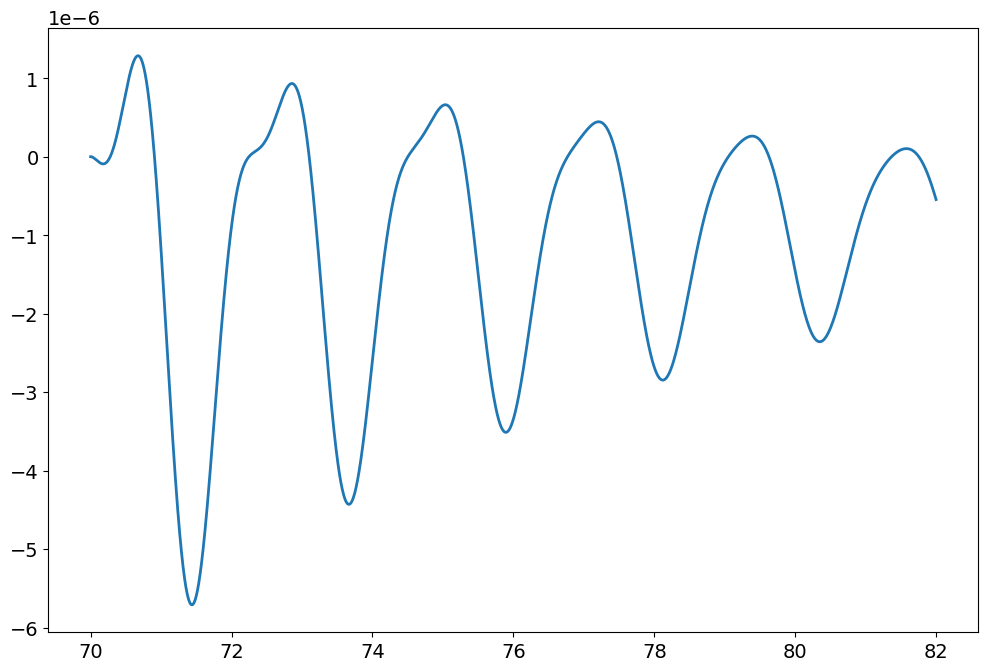

In [288]:
index_pin = 70000
t_step = []
value_pin_step=[]
for index_pin_walk in range(70000,82000):
    value_pin = (x_sol[index_pin]-x_sol[index_pin_walk+1])**2-(y_sol[index_pin]-y_sol[index_pin_walk+1])**2
    t_step.append(index_pin_walk)
    value_pin_step.append(value_pin)
    #print(value_pin)
t_step = np.array(t_step)/1000
plt.plot(t_step,value_pin_step)
value_pin_step

In [237]:
b=3

T = 100
dt = 0.001
n = int(T/dt)
time_seq = np.arange(0,T+dt,dt)
x_sol, y_sol = run(F,0,1,n)

value_pin = (x_sol[index_pin]-x_sol[index_pin_walk+1])**2-(y_sol[index_pin]-y_sol[index_pin_walk+1])**2

index_pin = np.where(time_seq == 80)[0][0]
index_pin_walk = index_pin


while value_pin!=0:
    index_pin_walk+=1
    print(index_pin_walk)
    value_pin = value_pin
    print(value_pin)

80001
-2.315547047530774
80002
-2.315547047530774
80003
-2.315547047530774
80004
-2.315547047530774
80005
-2.315547047530774
80006
-2.315547047530774
80007
-2.315547047530774
80008
-2.315547047530774
80009
-2.315547047530774
80010
-2.315547047530774
80011
-2.315547047530774
80012
-2.315547047530774
80013
-2.315547047530774
80014
-2.315547047530774
80015
-2.315547047530774
80016
-2.315547047530774
80017
-2.315547047530774
80018
-2.315547047530774
80019
-2.315547047530774
80020
-2.315547047530774
80021
-2.315547047530774
80022
-2.315547047530774
80023
-2.315547047530774
80024
-2.315547047530774
80025
-2.315547047530774
80026
-2.315547047530774
80027
-2.315547047530774
80028
-2.315547047530774
80029
-2.315547047530774
80030
-2.315547047530774
80031
-2.315547047530774
80032
-2.315547047530774
80033
-2.315547047530774
80034
-2.315547047530774
80035
-2.315547047530774
80036
-2.315547047530774
80037
-2.315547047530774
80038
-2.315547047530774
80039
-2.315547047530774
80040
-2.315547047530774


81671
-2.315547047530774
81672
-2.315547047530774
81673
-2.315547047530774
81674
-2.315547047530774
81675
-2.315547047530774
81676
-2.315547047530774
81677
-2.315547047530774
81678
-2.315547047530774
81679
-2.315547047530774
81680
-2.315547047530774
81681
-2.315547047530774
81682
-2.315547047530774
81683
-2.315547047530774
81684
-2.315547047530774
81685
-2.315547047530774
81686
-2.315547047530774
81687
-2.315547047530774
81688
-2.315547047530774
81689
-2.315547047530774
81690
-2.315547047530774
81691
-2.315547047530774
81692
-2.315547047530774
81693
-2.315547047530774
81694
-2.315547047530774
81695
-2.315547047530774
81696
-2.315547047530774
81697
-2.315547047530774
81698
-2.315547047530774
81699
-2.315547047530774
81700
-2.315547047530774
81701
-2.315547047530774
81702
-2.315547047530774
81703
-2.315547047530774
81704
-2.315547047530774
81705
-2.315547047530774
81706
-2.315547047530774
81707
-2.315547047530774
81708
-2.315547047530774
81709
-2.315547047530774
81710
-2.315547047530774


83016
-2.315547047530774
83017
-2.315547047530774
83018
-2.315547047530774
83019
-2.315547047530774
83020
-2.315547047530774
83021
-2.315547047530774
83022
-2.315547047530774
83023
-2.315547047530774
83024
-2.315547047530774
83025
-2.315547047530774
83026
-2.315547047530774
83027
-2.315547047530774
83028
-2.315547047530774
83029
-2.315547047530774
83030
-2.315547047530774
83031
-2.315547047530774
83032
-2.315547047530774
83033
-2.315547047530774
83034
-2.315547047530774
83035
-2.315547047530774
83036
-2.315547047530774
83037
-2.315547047530774
83038
-2.315547047530774
83039
-2.315547047530774
83040
-2.315547047530774
83041
-2.315547047530774
83042
-2.315547047530774
83043
-2.315547047530774
83044
-2.315547047530774
83045
-2.315547047530774
83046
-2.315547047530774
83047
-2.315547047530774
83048
-2.315547047530774
83049
-2.315547047530774
83050
-2.315547047530774
83051
-2.315547047530774
83052
-2.315547047530774
83053
-2.315547047530774
83054
-2.315547047530774
83055
-2.315547047530774


84717
-2.315547047530774
84718
-2.315547047530774
84719
-2.315547047530774
84720
-2.315547047530774
84721
-2.315547047530774
84722
-2.315547047530774
84723
-2.315547047530774
84724
-2.315547047530774
84725
-2.315547047530774
84726
-2.315547047530774
84727
-2.315547047530774
84728
-2.315547047530774
84729
-2.315547047530774
84730
-2.315547047530774
84731
-2.315547047530774
84732
-2.315547047530774
84733
-2.315547047530774
84734
-2.315547047530774
84735
-2.315547047530774
84736
-2.315547047530774
84737
-2.315547047530774
84738
-2.315547047530774
84739
-2.315547047530774
84740
-2.315547047530774
84741
-2.315547047530774
84742
-2.315547047530774
84743
-2.315547047530774
84744
-2.315547047530774
84745
-2.315547047530774
84746
-2.315547047530774
84747
-2.315547047530774
84748
-2.315547047530774
84749
-2.315547047530774
84750
-2.315547047530774
84751
-2.315547047530774
84752
-2.315547047530774
84753
-2.315547047530774
84754
-2.315547047530774
84755
-2.315547047530774
84756
-2.315547047530774


-2.315547047530774
86467
-2.315547047530774
86468
-2.315547047530774
86469
-2.315547047530774
86470
-2.315547047530774
86471
-2.315547047530774
86472
-2.315547047530774
86473
-2.315547047530774
86474
-2.315547047530774
86475
-2.315547047530774
86476
-2.315547047530774
86477
-2.315547047530774
86478
-2.315547047530774
86479
-2.315547047530774
86480
-2.315547047530774
86481
-2.315547047530774
86482
-2.315547047530774
86483
-2.315547047530774
86484
-2.315547047530774
86485
-2.315547047530774
86486
-2.315547047530774
86487
-2.315547047530774
86488
-2.315547047530774
86489
-2.315547047530774
86490
-2.315547047530774
86491
-2.315547047530774
86492
-2.315547047530774
86493
-2.315547047530774
86494
-2.315547047530774
86495
-2.315547047530774
86496
-2.315547047530774
86497
-2.315547047530774
86498
-2.315547047530774
86499
-2.315547047530774
86500
-2.315547047530774
86501
-2.315547047530774
86502
-2.315547047530774
86503
-2.315547047530774
86504
-2.315547047530774
86505
-2.315547047530774
86506


88011
-2.315547047530774
88012
-2.315547047530774
88013
-2.315547047530774
88014
-2.315547047530774
88015
-2.315547047530774
88016
-2.315547047530774
88017
-2.315547047530774
88018
-2.315547047530774
88019
-2.315547047530774
88020
-2.315547047530774
88021
-2.315547047530774
88022
-2.315547047530774
88023
-2.315547047530774
88024
-2.315547047530774
88025
-2.315547047530774
88026
-2.315547047530774
88027
-2.315547047530774
88028
-2.315547047530774
88029
-2.315547047530774
88030
-2.315547047530774
88031
-2.315547047530774
88032
-2.315547047530774
88033
-2.315547047530774
88034
-2.315547047530774
88035
-2.315547047530774
88036
-2.315547047530774
88037
-2.315547047530774
88038
-2.315547047530774
88039
-2.315547047530774
88040
-2.315547047530774
88041
-2.315547047530774
88042
-2.315547047530774
88043
-2.315547047530774
88044
-2.315547047530774
88045
-2.315547047530774
88046
-2.315547047530774
88047
-2.315547047530774
88048
-2.315547047530774
88049
-2.315547047530774
88050
-2.315547047530774


89931
-2.315547047530774
89932
-2.315547047530774
89933
-2.315547047530774
89934
-2.315547047530774
89935
-2.315547047530774
89936
-2.315547047530774
89937
-2.315547047530774
89938
-2.315547047530774
89939
-2.315547047530774
89940
-2.315547047530774
89941
-2.315547047530774
89942
-2.315547047530774
89943
-2.315547047530774
89944
-2.315547047530774
89945
-2.315547047530774
89946
-2.315547047530774
89947
-2.315547047530774
89948
-2.315547047530774
89949
-2.315547047530774
89950
-2.315547047530774
89951
-2.315547047530774
89952
-2.315547047530774
89953
-2.315547047530774
89954
-2.315547047530774
89955
-2.315547047530774
89956
-2.315547047530774
89957
-2.315547047530774
89958
-2.315547047530774
89959
-2.315547047530774
89960
-2.315547047530774
89961
-2.315547047530774
89962
-2.315547047530774
89963
-2.315547047530774
89964
-2.315547047530774
89965
-2.315547047530774
89966
-2.315547047530774
89967
-2.315547047530774
89968
-2.315547047530774
89969
-2.315547047530774
89970
-2.315547047530774


91466
-2.315547047530774
91467
-2.315547047530774
91468
-2.315547047530774
91469
-2.315547047530774
91470
-2.315547047530774
91471
-2.315547047530774
91472
-2.315547047530774
91473
-2.315547047530774
91474
-2.315547047530774
91475
-2.315547047530774
91476
-2.315547047530774
91477
-2.315547047530774
91478
-2.315547047530774
91479
-2.315547047530774
91480
-2.315547047530774
91481
-2.315547047530774
91482
-2.315547047530774
91483
-2.315547047530774
91484
-2.315547047530774
91485
-2.315547047530774
91486
-2.315547047530774
91487
-2.315547047530774
91488
-2.315547047530774
91489
-2.315547047530774
91490
-2.315547047530774
91491
-2.315547047530774
91492
-2.315547047530774
91493
-2.315547047530774
91494
-2.315547047530774
91495
-2.315547047530774
91496
-2.315547047530774
91497
-2.315547047530774
91498
-2.315547047530774
91499
-2.315547047530774
91500
-2.315547047530774
91501
-2.315547047530774
91502
-2.315547047530774
91503
-2.315547047530774
91504
-2.315547047530774
91505
-2.315547047530774


-2.315547047530774
93216
-2.315547047530774
93217
-2.315547047530774
93218
-2.315547047530774
93219
-2.315547047530774
93220
-2.315547047530774
93221
-2.315547047530774
93222
-2.315547047530774
93223
-2.315547047530774
93224
-2.315547047530774
93225
-2.315547047530774
93226
-2.315547047530774
93227
-2.315547047530774
93228
-2.315547047530774
93229
-2.315547047530774
93230
-2.315547047530774
93231
-2.315547047530774
93232
-2.315547047530774
93233
-2.315547047530774
93234
-2.315547047530774
93235
-2.315547047530774
93236
-2.315547047530774
93237
-2.315547047530774
93238
-2.315547047530774
93239
-2.315547047530774
93240
-2.315547047530774
93241
-2.315547047530774
93242
-2.315547047530774
93243
-2.315547047530774
93244
-2.315547047530774
93245
-2.315547047530774
93246
-2.315547047530774
93247
-2.315547047530774
93248
-2.315547047530774
93249
-2.315547047530774
93250
-2.315547047530774
93251
-2.315547047530774
93252
-2.315547047530774
93253
-2.315547047530774
93254
-2.315547047530774
93255


95083
-2.315547047530774
95084
-2.315547047530774
95085
-2.315547047530774
95086
-2.315547047530774
95087
-2.315547047530774
95088
-2.315547047530774
95089
-2.315547047530774
95090
-2.315547047530774
95091
-2.315547047530774
95092
-2.315547047530774
95093
-2.315547047530774
95094
-2.315547047530774
95095
-2.315547047530774
95096
-2.315547047530774
95097
-2.315547047530774
95098
-2.315547047530774
95099
-2.315547047530774
95100
-2.315547047530774
95101
-2.315547047530774
95102
-2.315547047530774
95103
-2.315547047530774
95104
-2.315547047530774
95105
-2.315547047530774
95106
-2.315547047530774
95107
-2.315547047530774
95108
-2.315547047530774
95109
-2.315547047530774
95110
-2.315547047530774
95111
-2.315547047530774
95112
-2.315547047530774
95113
-2.315547047530774
95114
-2.315547047530774
95115
-2.315547047530774
95116
-2.315547047530774
95117
-2.315547047530774
95118
-2.315547047530774
95119
-2.315547047530774
95120
-2.315547047530774
95121
-2.315547047530774
95122
-2.315547047530774


96965
-2.315547047530774
96966
-2.315547047530774
96967
-2.315547047530774
96968
-2.315547047530774
96969
-2.315547047530774
96970
-2.315547047530774
96971
-2.315547047530774
96972
-2.315547047530774
96973
-2.315547047530774
96974
-2.315547047530774
96975
-2.315547047530774
96976
-2.315547047530774
96977
-2.315547047530774
96978
-2.315547047530774
96979
-2.315547047530774
96980
-2.315547047530774
96981
-2.315547047530774
96982
-2.315547047530774
96983
-2.315547047530774
96984
-2.315547047530774
96985
-2.315547047530774
96986
-2.315547047530774
96987
-2.315547047530774
96988
-2.315547047530774
96989
-2.315547047530774
96990
-2.315547047530774
96991
-2.315547047530774
96992
-2.315547047530774
96993
-2.315547047530774
96994
-2.315547047530774
96995
-2.315547047530774
96996
-2.315547047530774
96997
-2.315547047530774
96998
-2.315547047530774
96999
-2.315547047530774
97000
-2.315547047530774
97001
-2.315547047530774
97002
-2.315547047530774
97003
-2.315547047530774
97004
-2.315547047530774


-2.315547047530774
98827
-2.315547047530774
98828
-2.315547047530774
98829
-2.315547047530774
98830
-2.315547047530774
98831
-2.315547047530774
98832
-2.315547047530774
98833
-2.315547047530774
98834
-2.315547047530774
98835
-2.315547047530774
98836
-2.315547047530774
98837
-2.315547047530774
98838
-2.315547047530774
98839
-2.315547047530774
98840
-2.315547047530774
98841
-2.315547047530774
98842
-2.315547047530774
98843
-2.315547047530774
98844
-2.315547047530774
98845
-2.315547047530774
98846
-2.315547047530774
98847
-2.315547047530774
98848
-2.315547047530774
98849
-2.315547047530774
98850
-2.315547047530774
98851
-2.315547047530774
98852
-2.315547047530774
98853
-2.315547047530774
98854
-2.315547047530774
98855
-2.315547047530774
98856
-2.315547047530774
98857
-2.315547047530774
98858
-2.315547047530774
98859
-2.315547047530774
98860
-2.315547047530774
98861
-2.315547047530774
98862
-2.315547047530774
98863
-2.315547047530774
98864
-2.315547047530774
98865
-2.315547047530774
98866


-2.315547047530774
100715
-2.315547047530774
100716
-2.315547047530774
100717
-2.315547047530774
100718
-2.315547047530774
100719
-2.315547047530774
100720
-2.315547047530774
100721
-2.315547047530774
100722
-2.315547047530774
100723
-2.315547047530774
100724
-2.315547047530774
100725
-2.315547047530774
100726
-2.315547047530774
100727
-2.315547047530774
100728
-2.315547047530774
100729
-2.315547047530774
100730
-2.315547047530774
100731
-2.315547047530774
100732
-2.315547047530774
100733
-2.315547047530774
100734
-2.315547047530774
100735
-2.315547047530774
100736
-2.315547047530774
100737
-2.315547047530774
100738
-2.315547047530774
100739
-2.315547047530774
100740
-2.315547047530774
100741
-2.315547047530774
100742
-2.315547047530774
100743
-2.315547047530774
100744
-2.315547047530774
100745
-2.315547047530774
100746
-2.315547047530774
100747
-2.315547047530774
100748
-2.315547047530774
100749
-2.315547047530774
100750
-2.315547047530774
100751
-2.315547047530774
100752
-2.315547047

-2.315547047530774
102465
-2.315547047530774
102466
-2.315547047530774
102467
-2.315547047530774
102468
-2.315547047530774
102469
-2.315547047530774
102470
-2.315547047530774
102471
-2.315547047530774
102472
-2.315547047530774
102473
-2.315547047530774
102474
-2.315547047530774
102475
-2.315547047530774
102476
-2.315547047530774
102477
-2.315547047530774
102478
-2.315547047530774
102479
-2.315547047530774
102480
-2.315547047530774
102481
-2.315547047530774
102482
-2.315547047530774
102483
-2.315547047530774
102484
-2.315547047530774
102485
-2.315547047530774
102486
-2.315547047530774
102487
-2.315547047530774
102488
-2.315547047530774
102489
-2.315547047530774
102490
-2.315547047530774
102491
-2.315547047530774
102492
-2.315547047530774
102493
-2.315547047530774
102494
-2.315547047530774
102495
-2.315547047530774
102496
-2.315547047530774
102497
-2.315547047530774
102498
-2.315547047530774
102499
-2.315547047530774
102500
-2.315547047530774
102501
-2.315547047530774
102502
-2.315547047

103964
-2.315547047530774
103965
-2.315547047530774
103966
-2.315547047530774
103967
-2.315547047530774
103968
-2.315547047530774
103969
-2.315547047530774
103970
-2.315547047530774
103971
-2.315547047530774
103972
-2.315547047530774
103973
-2.315547047530774
103974
-2.315547047530774
103975
-2.315547047530774
103976
-2.315547047530774
103977
-2.315547047530774
103978
-2.315547047530774
103979
-2.315547047530774
103980
-2.315547047530774
103981
-2.315547047530774
103982
-2.315547047530774
103983
-2.315547047530774
103984
-2.315547047530774
103985
-2.315547047530774
103986
-2.315547047530774
103987
-2.315547047530774
103988
-2.315547047530774
103989
-2.315547047530774
103990
-2.315547047530774
103991
-2.315547047530774
103992
-2.315547047530774
103993
-2.315547047530774
103994
-2.315547047530774
103995
-2.315547047530774
103996
-2.315547047530774
103997
-2.315547047530774
103998
-2.315547047530774
103999
-2.315547047530774
104000
-2.315547047530774
104001
-2.315547047530774
104002
-2.31

105714
-2.315547047530774
105715
-2.315547047530774
105716
-2.315547047530774
105717
-2.315547047530774
105718
-2.315547047530774
105719
-2.315547047530774
105720
-2.315547047530774
105721
-2.315547047530774
105722
-2.315547047530774
105723
-2.315547047530774
105724
-2.315547047530774
105725
-2.315547047530774
105726
-2.315547047530774
105727
-2.315547047530774
105728
-2.315547047530774
105729
-2.315547047530774
105730
-2.315547047530774
105731
-2.315547047530774
105732
-2.315547047530774
105733
-2.315547047530774
105734
-2.315547047530774
105735
-2.315547047530774
105736
-2.315547047530774
105737
-2.315547047530774
105738
-2.315547047530774
105739
-2.315547047530774
105740
-2.315547047530774
105741
-2.315547047530774
105742
-2.315547047530774
105743
-2.315547047530774
105744
-2.315547047530774
105745
-2.315547047530774
105746
-2.315547047530774
105747
-2.315547047530774
105748
-2.315547047530774
105749
-2.315547047530774
105750
-2.315547047530774
105751
-2.315547047530774
105752
-2.31

-2.315547047530774
107464
-2.315547047530774
107465
-2.315547047530774
107466
-2.315547047530774
107467
-2.315547047530774
107468
-2.315547047530774
107469
-2.315547047530774
107470
-2.315547047530774
107471
-2.315547047530774
107472
-2.315547047530774
107473
-2.315547047530774
107474
-2.315547047530774
107475
-2.315547047530774
107476
-2.315547047530774
107477
-2.315547047530774
107478
-2.315547047530774
107479
-2.315547047530774
107480
-2.315547047530774
107481
-2.315547047530774
107482
-2.315547047530774
107483
-2.315547047530774
107484
-2.315547047530774
107485
-2.315547047530774
107486
-2.315547047530774
107487
-2.315547047530774
107488
-2.315547047530774
107489
-2.315547047530774
107490
-2.315547047530774
107491
-2.315547047530774
107492
-2.315547047530774
107493
-2.315547047530774
107494
-2.315547047530774
107495
-2.315547047530774
107496
-2.315547047530774
107497
-2.315547047530774
107498
-2.315547047530774
107499
-2.315547047530774
107500
-2.315547047530774
107501
-2.315547047

-2.315547047530774
109214
-2.315547047530774
109215
-2.315547047530774
109216
-2.315547047530774
109217
-2.315547047530774
109218
-2.315547047530774
109219
-2.315547047530774
109220
-2.315547047530774
109221
-2.315547047530774
109222
-2.315547047530774
109223
-2.315547047530774
109224
-2.315547047530774
109225
-2.315547047530774
109226
-2.315547047530774
109227
-2.315547047530774
109228
-2.315547047530774
109229
-2.315547047530774
109230
-2.315547047530774
109231
-2.315547047530774
109232
-2.315547047530774
109233
-2.315547047530774
109234
-2.315547047530774
109235
-2.315547047530774
109236
-2.315547047530774
109237
-2.315547047530774
109238
-2.315547047530774
109239
-2.315547047530774
109240
-2.315547047530774
109241
-2.315547047530774
109242
-2.315547047530774
109243
-2.315547047530774
109244
-2.315547047530774
109245
-2.315547047530774
109246
-2.315547047530774
109247
-2.315547047530774
109248
-2.315547047530774
109249
-2.315547047530774
109250
-2.315547047530774
109251
-2.315547047

-2.315547047530774
111017
-2.315547047530774
111018
-2.315547047530774
111019
-2.315547047530774
111020
-2.315547047530774
111021
-2.315547047530774
111022
-2.315547047530774
111023
-2.315547047530774
111024
-2.315547047530774
111025
-2.315547047530774
111026
-2.315547047530774
111027
-2.315547047530774
111028
-2.315547047530774
111029
-2.315547047530774
111030
-2.315547047530774
111031
-2.315547047530774
111032
-2.315547047530774
111033
-2.315547047530774
111034
-2.315547047530774
111035
-2.315547047530774
111036
-2.315547047530774
111037
-2.315547047530774
111038
-2.315547047530774
111039
-2.315547047530774
111040
-2.315547047530774
111041
-2.315547047530774
111042
-2.315547047530774
111043
-2.315547047530774
111044
-2.315547047530774
111045
-2.315547047530774
111046
-2.315547047530774
111047
-2.315547047530774
111048
-2.315547047530774
111049
-2.315547047530774
111050
-2.315547047530774
111051
-2.315547047530774
111052
-2.315547047530774
111053
-2.315547047530774
111054
-2.315547047

112963
-2.315547047530774
112964
-2.315547047530774
112965
-2.315547047530774
112966
-2.315547047530774
112967
-2.315547047530774
112968
-2.315547047530774
112969
-2.315547047530774
112970
-2.315547047530774
112971
-2.315547047530774
112972
-2.315547047530774
112973
-2.315547047530774
112974
-2.315547047530774
112975
-2.315547047530774
112976
-2.315547047530774
112977
-2.315547047530774
112978
-2.315547047530774
112979
-2.315547047530774
112980
-2.315547047530774
112981
-2.315547047530774
112982
-2.315547047530774
112983
-2.315547047530774
112984
-2.315547047530774
112985
-2.315547047530774
112986
-2.315547047530774
112987
-2.315547047530774
112988
-2.315547047530774
112989
-2.315547047530774
112990
-2.315547047530774
112991
-2.315547047530774
112992
-2.315547047530774
112993
-2.315547047530774
112994
-2.315547047530774
112995
-2.315547047530774
112996
-2.315547047530774
112997
-2.315547047530774
112998
-2.315547047530774
112999
-2.315547047530774
113000
-2.315547047530774
113001
-2.31

-2.315547047530774
114825
-2.315547047530774
114826
-2.315547047530774
114827
-2.315547047530774
114828
-2.315547047530774
114829
-2.315547047530774
114830
-2.315547047530774
114831
-2.315547047530774
114832
-2.315547047530774
114833
-2.315547047530774
114834
-2.315547047530774
114835
-2.315547047530774
114836
-2.315547047530774
114837
-2.315547047530774
114838
-2.315547047530774
114839
-2.315547047530774
114840
-2.315547047530774
114841
-2.315547047530774
114842
-2.315547047530774
114843
-2.315547047530774
114844
-2.315547047530774
114845
-2.315547047530774
114846
-2.315547047530774
114847
-2.315547047530774
114848
-2.315547047530774
114849
-2.315547047530774
114850
-2.315547047530774
114851
-2.315547047530774
114852
-2.315547047530774
114853
-2.315547047530774
114854
-2.315547047530774
114855
-2.315547047530774
114856
-2.315547047530774
114857
-2.315547047530774
114858
-2.315547047530774
114859
-2.315547047530774
114860
-2.315547047530774
114861
-2.315547047530774
114862
-2.315547047

-2.315547047530774
116564
-2.315547047530774
116565
-2.315547047530774
116566
-2.315547047530774
116567
-2.315547047530774
116568
-2.315547047530774
116569
-2.315547047530774
116570
-2.315547047530774
116571
-2.315547047530774
116572
-2.315547047530774
116573
-2.315547047530774
116574
-2.315547047530774
116575
-2.315547047530774
116576
-2.315547047530774
116577
-2.315547047530774
116578
-2.315547047530774
116579
-2.315547047530774
116580
-2.315547047530774
116581
-2.315547047530774
116582
-2.315547047530774
116583
-2.315547047530774
116584
-2.315547047530774
116585
-2.315547047530774
116586
-2.315547047530774
116587
-2.315547047530774
116588
-2.315547047530774
116589
-2.315547047530774
116590
-2.315547047530774
116591
-2.315547047530774
116592
-2.315547047530774
116593
-2.315547047530774
116594
-2.315547047530774
116595
-2.315547047530774
116596
-2.315547047530774
116597
-2.315547047530774
116598
-2.315547047530774
116599
-2.315547047530774
116600
-2.315547047530774
116601
-2.315547047

118212
-2.315547047530774
118213
-2.315547047530774
118214
-2.315547047530774
118215
-2.315547047530774
118216
-2.315547047530774
118217
-2.315547047530774
118218
-2.315547047530774
118219
-2.315547047530774
118220
-2.315547047530774
118221
-2.315547047530774
118222
-2.315547047530774
118223
-2.315547047530774
118224
-2.315547047530774
118225
-2.315547047530774
118226
-2.315547047530774
118227
-2.315547047530774
118228
-2.315547047530774
118229
-2.315547047530774
118230
-2.315547047530774
118231
-2.315547047530774
118232
-2.315547047530774
118233
-2.315547047530774
118234
-2.315547047530774
118235
-2.315547047530774
118236
-2.315547047530774
118237
-2.315547047530774
118238
-2.315547047530774
118239
-2.315547047530774
118240
-2.315547047530774
118241
-2.315547047530774
118242
-2.315547047530774
118243
-2.315547047530774
118244
-2.315547047530774
118245
-2.315547047530774
118246
-2.315547047530774
118247
-2.315547047530774
118248
-2.315547047530774
118249
-2.315547047530774
118250
-2.31

KeyboardInterrupt: 

## 9. Solve for the values of $T_{period}$ for parameter values $b$ in $numpy.linspace(2,3.5,10)$ 
